In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

pd.options.mode.chained_assignment = None  # default='warn'

do_head = ('FW_TS','FW_LD','FW_FS','FW_TB','SYS_FS','SYS_EA','SYS_CHK','RT_RST')

In [2]:
#  LD_MDI_1_T_HTDW_AMDS_AMDS_RPTIDVMON---依赖丢失上游

NameError: name 'LD_MDI_1_T_HTDW_AMDS_AMDS_RPTIDVMON' is not defined

In [3]:
train_list = ['180828', '180829', '180830', '180831', '180901', '180902', '180903', '180904', '180905',\
          '180906', '180907', '180908', '180909', '180910', '180911', '180912', '180913', '180914', '180915',\
          '180916', '180917', '180918', '180919', '180920', '180921', '180922', '180923', '180924', '180925', \
          '180926', '180927', '180928', '180929', '180930', '181001', '181002', '181003', '181004', '181005', \
          '181006', '181007', '181008', '181009', '181010', '181011', '181012', '181013', '181014', '181015', \
           '181016', '181017', '181018', '181019', '181020', '181021',\
           '181022', '181023', '181024', '181025', '181026', '181027', '181028', '181029','181101',\
             '181030','181031','181101' ]

valid_list = ['181102','181103','181104','181105', '181106', '181107', '181108', '181109','181110']

In [4]:
#day = day_i
day = '181017'
day_begain = int('20'+day+'000000')
day_4_hour = int('20'+day+'040000')

dat_start = datetime.datetime.strptime(str(day_begain),'%Y%m%d%H%M%S')

def f_get_end_dt(x):
    dat_t = datetime.datetime.strptime(str(x),'%Y%m%d%H%M%S')
    dt = (dat_t-dat_start).total_seconds()//60
    return dt

def cnv_start_time(x):
    return x//100*60+x%100

In [5]:
# dt 表

day_i = '181017'
pred_dt_df = pd.read_csv(r'./pred_dt/pre_dt_%s.csv'%day_i)
pred_dt_df = pred_dt_df[['order_id','job_name','end_time','day_bef_0_dt','pre_dt']]


In [6]:
pred_dt_df[['job_name','pre_dt']].head()

,job_name,pre_dt
0,HS_OFB_BRTL_L_BRTL_AS_CUID_TRX_TW_52_SR_1,40.15
1,SYS_FS_LD_TDW_1_F_HCGC_TTG_SHJJ_860000031,1428.04
2,SYS_FW_ARTC_P_ARTC_R_CH_CMB_OTH_GLD_EAC_INF_S,1.38
3,EXZ_T_HTDW_AAML_AAML_AB44_LRG_CSH_MSTAT_FZ_RPT,14.98
4,RF_RST_B571_ACOC_HZYJ_PFM_BIL_USR_RNK_INF,456.57


### ajob表处理

In [7]:
#ajob表
day_int = int(day)
ajob = pd.read_csv(r'E:\jupyter\CTM\data_src\ajob_0\ajob_%s_0.csv'%day,low_memory=False)
print('src',ajob.shape)

ajob = ajob[ajob.end_time.notnull()]
print('end_notnull',ajob.shape)


src (269103, 21)
end_notnull (267219, 21)


In [8]:
ajob_use = ajob[['job_name','edt']]
print(ajob_use.head())

                                  job_name  edt
0                SYS_SP_E_JOB_PROGRESS_AVG  1.0
1                      PRC_WKD_PARM_INF_V1  1.0
2   DSC_DB_LST_HDFB_A_SP_C_FND_DATA_DEL_V1  1.0
3  EX_P_HRSN_04_CI_VIW_V_CI_CELL_PACKAGE_Y  2.0
4  EX_P_HRSN_06_CI_VIW_V_CI_CELL_PACKAGE_Y  2.0


### 筛选出有时间窗口的ajob表

In [9]:
# 获取有开始时间窗口的依赖

ajob_from_t = ajob[ajob.from_time>1][['job_name','from_time']]
ajob_from_t['from_time'] = ajob_from_t['from_time'].apply(cnv_start_time)
ajob_from_t['up'] = '--'

ajob_from_t.rename(columns={"job_name":"down"}, inplace = True)
ajob_from_t.rename(columns={"from_time":"up_edt"}, inplace = True)

print(ajob_from_t.tail())
print(ajob_from_t.shape)

                                                     down  up_edt  up
267142                                    AD_DXP_MOVGZDAT   720.0  --
267160  TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_FUN_PROD_TRX_I...   720.0  --
267161        TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_BAS_INF_S_0   720.0  --
267162   TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_HLD_PROD_INF_S_0   720.0  --
267211             TB_P_HOFB_2_P_AHDP_MOB_CLIENT_PAGE_MID   720.0  --
(14525, 3)


### 依赖关系表处理

In [10]:
condition_i = pd.read_csv(r'E:\jupyter\CTM\data_processed\condition_o\condition_%s.csv'%day)
print(condition_i.shape)

(295483, 2)


### 依赖关系表加入 up作业结束时间

In [11]:
condition_use = condition_i[['up','down']]

condition_use = pd.merge(condition_use,ajob_use,how='left',left_on='up',right_on='job_name')
condition_use.rename(columns={"edt":"up_edt"}, inplace = True)

del condition_use['job_name']
print(condition_use.tail())
print(condition_use.shape)

                                                       up  \
295478     SYS_FS_LD_MDI_1_T_HTDW_AMDS_AMDS_CR070106_A001   
295479     SYS_FS_LD_MDI_1_T_HTDW_AMDS_AMDS_CR070203_A004   
295480     SYS_FS_LD_MDI_1_T_HTDW_AMDS_AMDS_CR070408_A001   
295481              MDI_DB_ETL_PRO_CTMRTNSQL_RTN_MDIDTA_0   
295482  SYS_FS_LD_MDI_1_T_HTDW_AMDS_AMDS_CA030211_A001...   

                                            down  up_edt  
295478   MDI_DB_ETL_PRO_CTMRTNSQL_RTN_CR070208_0   261.0  
295479   MDI_DB_ETL_PRO_CTMRTNSQL_RTN_CR070208_0   451.0  
295480  MDI_DB_ETL_PRO_CTMRTNSQL_RTN_CR0704HIV_0   996.0  
295481   MDI_DB_ETL_PRO_CTMRTNSQL_RTN_CA030211_0   426.0  
295482   MDI_DB_ETL_PRO_CTMRTNSQL_RTN_CA030211_0  1856.0  
(295483, 3)


In [12]:
# 依赖关系表合并有时间窗口作业表，虚拟出上游表
condition_merge_from = pd.concat([condition_use,ajob_from_t], ignore_index=True)
print(condition_merge_from.shape)

(310008, 3)


In [13]:
print(condition_merge_from.head(2))
print(condition_merge_from.tail(2))

                                                down  \
0                  EX_T_HTDW_BRMD_BRMD_C_HT02_BS_INF   
1  EX_T_HTDW_BRMD_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   

                                                 up  up_edt  
0                  SYS_FS_BRMD_V_BRMD_C_HT02_BS_INF    70.0  
1  SYS_FS_BRMD_V_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   160.0  
                                                    down  up  up_edt
310006  TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_HLD_PROD_INF_S_0  --   720.0
310007            TB_P_HOFB_2_P_AHDP_MOB_CLIENT_PAGE_MID  --   720.0


### 依赖关系表加入 down作业结束时间

In [14]:
condition_merge_from = pd.merge(condition_merge_from,ajob_use,how='left',left_on='down',right_on='job_name')
condition_merge_from.rename(columns={"edt":"down_edt"}, inplace = True)
print(condition_merge_from.shape)

condition_merge_from.tail()

(310008, 5)


,down,up,up_edt,job_name,down_edt
310003,AD_DXP_MOVGZDAT,--,720.0,AD_DXP_MOVGZDAT,2115.0
310004,TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_FUN_PROD_TRX_I...,--,720.0,TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_FUN_PROD_TRX_I...,2174.0
310005,TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_BAS_INF_S_0,--,720.0,TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_BAS_INF_S_0,2195.0
310006,TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_HLD_PROD_INF_S_0,--,720.0,TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_HLD_PROD_INF_S_0,2213.0
310007,TB_P_HOFB_2_P_AHDP_MOB_CLIENT_PAGE_MID,--,720.0,TB_P_HOFB_2_P_AHDP_MOB_CLIENT_PAGE_MID,2403.0


In [15]:
del condition_merge_from['job_name']
condition_merge_from.head()

,down,up,up_edt,down_edt
0,EX_T_HTDW_BRMD_BRMD_C_HT02_BS_INF,SYS_FS_BRMD_V_BRMD_C_HT02_BS_INF,70.0,NaN
1,EX_T_HTDW_BRMD_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL,SYS_FS_BRMD_V_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL,160.0,NaN
2,EXQ_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD,EX_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD,257.0,NaN
3,EX_T_HTDW_BRMD_BRMD_C_HT02_CTF_BND_INF,SYS_FS_BRMD_V_BRMD_C_HT02_CTF_BND_INF,55.0,NaN
4,EXQ_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE,EX_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE,188.0,NaN


### 依赖关系表加入dt

In [16]:
condition_merge_from = condition_merge_from.merge(pred_dt_df[['job_name','pre_dt']],how='left',left_on='down',right_on='job_name')
del condition_merge_from['job_name']
print(condition_merge_from.head())

                                                down  \
0                  EX_T_HTDW_BRMD_BRMD_C_HT02_BS_INF   
1  EX_T_HTDW_BRMD_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   
2         EXQ_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   
3             EX_T_HTDW_BRMD_BRMD_C_HT02_CTF_BND_INF   
4            EXQ_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   

                                                 up  up_edt  down_edt  pre_dt  
0                  SYS_FS_BRMD_V_BRMD_C_HT02_BS_INF    70.0       NaN     NaN  
1  SYS_FS_BRMD_V_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   160.0       NaN     NaN  
2         EX_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   257.0       NaN     NaN  
3             SYS_FS_BRMD_V_BRMD_C_HT02_CTF_BND_INF    55.0       NaN     NaN  
4            EX_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   188.0       NaN     NaN  


In [17]:
print(condition_merge_from.tail())

                                                     down  up  up_edt  \
310003                                    AD_DXP_MOVGZDAT  --   720.0   
310004  TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_FUN_PROD_TRX_I...  --   720.0   
310005        TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_BAS_INF_S_0  --   720.0   
310006   TFZ_T_HTDW_ARTS_ARTS_A_RTL_CUST_HLD_PROD_INF_S_0  --   720.0   
310007             TB_P_HOFB_2_P_AHDP_MOB_CLIENT_PAGE_MID  --   720.0   

        down_edt  pre_dt  
310003    2115.0  853.70  
310004    2174.0   27.19  
310005    2195.0   31.49  
310006    2213.0   31.49  
310007    2403.0  864.84  


In [18]:
# 作业漏预测 查看
condition_merge_from[(condition_merge_from.down_edt>240) & (condition_merge_from['pre_dt'].isnull())]

,down,up,up_edt,down_edt,pre_dt
30716,TB_P_HPCQ_1_CRDDTA_RECORDDETAIL,FW_TB_P_HPCQ_1_CRDDTA_RECORDDETAIL1,475.0,3258.0,NaN
30917,TB_P_HPCQ_1_CRDDTA_RECORDDETAIL,FW_TB_P_HPCQ_1_CRDDTA_RECORDDETAIL,340.0,3258.0,NaN
34612,TB_P_HOFA_2_P_AHDP_MOB_CLIENT_CLICK_MID,RU_P_HOFA_2_P_AHDP_MOB_CLIENT_CLICK_MID,1116.0,4082.0,NaN
35704,TB_P_HOFA_2_P_AHDP_MOB_CLIENT_CLICK_MID,FW_TB_P_HOFA_2_P_AHDP_MOB_CLIENT_CLICK_MID,590.0,4082.0,NaN
37401,TB_P_HOFA_2_P_AHDP_LOG_MOB_USR_BEV_UID_MID,RU_P_HOFA_2_P_AHDP_LOG_MOB_USR_BEV_UID_MID,1217.0,6082.0,NaN
38262,TB_P_HOFA_2_P_AHDP_LOG_MOB_USR_BEV_UID_MID,FW_TB_P_HOFA_2_P_AHDP_LOG_MOB_USR_BEV_UID_MID,445.0,6082.0,NaN


In [19]:
no_up_job = pd.read_csv(r'./pred_dt/noup_job_edt_%s.csv'%day)[['job_name','pred_edt']]
#替换  初始化 --up_know

def init_up_kown_edt(x):
    if x[1]<=240:
        return x[1]
    elif x[0]=='--':
        return x[1]
    elif x[0] in no_up_job['job_name'].values:
        return no_up_job[no_up_job.job_name==x[0]]['pred_edt'].values()
    else:
        return None
#初始化已知上游作业结束时间

condition_merge_from['up_edt_small'] = condition_merge_from['up_edt'].apply(lambda x:x<=240).apply(int)
condition_merge_from['up__'] = condition_merge_from['up'].apply(lambda x:x=='--').apply(int)

condition_merge_from['up_edt_noup'] = condition_merge_from.merge(no_up_job,left_on='up',right_on ='job_name' ,how='left')['pred_edt']



del condition_merge_from['up_edt_small']
del condition_merge_from['up__']
del condition_merge_from['up_edt_noup']


condition_merge_from['up_konw'] = condition_merge_from[['up','up_edt']].apply(lambda x:init_up_kown_edt(x),axis=1)

# 根据已经知道上游结束时间，算出下游结束时间
def init_down_edt(x):
    if x>240:
        return None
    else:
        return x
condition_merge_from['down_sum'] = condition_merge_from['down_edt'].apply(init_down_edt)

print(condition_merge_from.shape,condition_merge_from[condition_merge_from['down_sum'].notnull()].shape)

(310008, 7) (108998, 7)


In [23]:
condition_merge_from['up_edt_small'] = condition_merge_from['up_edt'].apply(lambda x:x<=240).apply(int)
condition_merge_from['up__'] = condition_merge_from['up'].apply(lambda x:x=='--').apply(int)

condition_merge_from['up_edt_noup'] = condition_merge_from.merge(no_up_job,left_on='up',right_on ='job_name' ,how='left')['pred_edt']

print(condition_merge_from.head())

                                                down  \
0                  EX_T_HTDW_BRMD_BRMD_C_HT02_BS_INF   
1  EX_T_HTDW_BRMD_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   
2         EXQ_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   
3             EX_T_HTDW_BRMD_BRMD_C_HT02_CTF_BND_INF   
4            EXQ_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   

                                                 up  up_edt  down_edt  pre_dt  \
0                  SYS_FS_BRMD_V_BRMD_C_HT02_BS_INF    70.0       NaN     NaN   
1  SYS_FS_BRMD_V_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   160.0       NaN     NaN   
2         EX_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   257.0       NaN     NaN   
3             SYS_FS_BRMD_V_BRMD_C_HT02_CTF_BND_INF    55.0       NaN     NaN   
4            EX_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   188.0       NaN     NaN   

  up_konw  down_sum  up_edt_small  up__  up_edt_noup  
0      70       NaN             1     0          NaN  
1     160       NaN             1     0          NaN  
2    None  

In [24]:
print(condition_merge_from[condition_merge_from.up_edt_noup.notnull()].head())

                                                 down  \
30                  EX_T_HTDW_ARDS_ARDS_C03_A3ACTDTAP   
51                  EX_T_HTDW_ARDS_ARDS_C04_A3ACTDTAP   
104  EX_T_HTDW_AUPR_AUPR_AB90_LDM_CDE_STATICVALUE_MPJ   
107        EX_T_HTDW_ARDR_ARDR_AB90_CVM_CUST_INF_VIEW   
108    EX_T_HTDW_ARDR_ARDR_AB90_CL_ENTR_LOAN_DTL_VIEW   

                                                  up  up_edt  down_edt  \
30                      SYS_FS_NDS#C_NLI08_A3ACTDTAP   400.0       NaN   
51                      SYS_FS_NDS#C_NLI08_A3ACTDTAP   400.0       NaN   
104  SYS_FS_AUPR_P_AUPR_AB90_LDM_CDE_STATICVALUE_MPJ   255.0       NaN   
107             SYS_FS_ARDR_P_ARDR_AB90_CVM_CUST_INF   280.0       NaN   
108         SYS_FS_ARDR_P_ARDR_AB90_CL_ENTR_LOAN_DTL   690.0       NaN   

     pre_dt          up_konw  down_sum  up_edt_small  up__  up_edt_noup  
30      NaN  [473.119349189]       NaN             0     0   473.119349  
51      NaN  [473.119349189]       NaN             0     0   473

In [20]:
condition_merge_from[condition_merge_from['up']=='FW_LD_MDI_1_T_HTDW_AMDS_AMDS_RPTIDVMON']

,down,up,up_edt,down_edt,pre_dt,up_konw,down_sum
78527,LD_MDI_1_T_HTDW_AMDS_AMDS_RPTIDVMON,FW_LD_MDI_1_T_HTDW_AMDS_AMDS_RPTIDVMON,435.0,439.0,35.81,[405.420609251],NaN


In [20]:
print(condition_merge_from.head())

                                                down  \
0                  EX_T_HTDW_BRMD_BRMD_C_HT02_BS_INF   
1  EX_T_HTDW_BRMD_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   
2         EXQ_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   
3             EX_T_HTDW_BRMD_BRMD_C_HT02_CTF_BND_INF   
4            EXQ_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   

                                                 up  up_edt  down_edt  pre_dt  \
0                  SYS_FS_BRMD_V_BRMD_C_HT02_BS_INF    70.0       NaN     NaN   
1  SYS_FS_BRMD_V_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   160.0       NaN     NaN   
2         EX_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   257.0       NaN     NaN   
3             SYS_FS_BRMD_V_BRMD_C_HT02_CTF_BND_INF    55.0       NaN     NaN   
4            EX_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   188.0       NaN     NaN   

   up_konw  down_sum  
0     70.0       NaN  
1    160.0       NaN  
2      NaN       NaN  
3     55.0       NaN  
4    188.0       NaN  


In [21]:
condition_merge_from['up_konw'].fillna(100000,inplace=True)
condition_merge_from[condition_merge_from['up_konw'].notnull()][:10]

,down,up,up_edt,down_edt,pre_dt,up_konw,down_sum
0,EX_T_HTDW_BRMD_BRMD_C_HT02_BS_INF,SYS_FS_BRMD_V_BRMD_C_HT02_BS_INF,70.0,NaN,NaN,70.0,NaN
1,EX_T_HTDW_BRMD_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL,SYS_FS_BRMD_V_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL,160.0,NaN,NaN,160.0,NaN
2,EXQ_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD,EX_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD,257.0,NaN,NaN,100000.0,NaN
3,EX_T_HTDW_BRMD_BRMD_C_HT02_CTF_BND_INF,SYS_FS_BRMD_V_BRMD_C_HT02_CTF_BND_INF,55.0,NaN,NaN,55.0,NaN
4,EXQ_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE,EX_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE,188.0,NaN,NaN,188.0,NaN
5,EXQ_P_HMBM_1_CMB_TAB_SHYYGZGL_HANDOVER_DETAIL,EX_P_HMBM_1_CMB_TAB_SHYYGZGL_HANDOVER_DETAIL,64.0,NaN,NaN,64.0,NaN
6,EXQ_P_HIPM_1_PMS_PMS_INVOBJ_TRC_FILES_MAP,EX_P_HIPM_1_PMS_PMS_INVOBJ_TRC_FILES_MAP,244.0,NaN,NaN,100000.0,NaN
7,TRQ_CRDA_EHDLEA1U,TR_CRDA_EHDLEA1U,345.0,NaN,NaN,100000.0,NaN
8,EXQ_A_HC10_A3DTA_A3DTFB06P,EX_A_HC10_A3DTA_A3DTFB06P,513.0,NaN,NaN,100000.0,NaN
9,TRQ_HMCA_CUSTCOUP_DAY_V2,TR_HMCA_CUSTCOUP_DAY_V2,32.0,NaN,NaN,32.0,NaN


In [22]:
#步骤1  ---up_max
up_max = condition_merge_from.groupby('down')['up_konw'].max()
up_max = up_max.to_frame(name='up_max')
up_max['down'] = up_max.index
print(up_max.head(2))
condition_merge_from = condition_merge_from.merge(up_max,how='left',on='down')
print(condition_merge.head(2))

                              up_max                        down
down                                                            
AAKP_C_AAKP_A_BUSMID_S_RPT  100000.0  AAKP_C_AAKP_A_BUSMID_S_RPT
AAKP_C_AAKP_M_BIL_STS_S     100000.0     AAKP_C_AAKP_M_BIL_STS_S
                                                down  \
0                  EX_T_HTDW_BRMD_BRMD_C_HT02_BS_INF   
1  EX_T_HTDW_BRMD_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   

                                                 up  up_edt  down_edt  pre_dt  \
0                  SYS_FS_BRMD_V_BRMD_C_HT02_BS_INF    70.0       NaN     NaN   
1  SYS_FS_BRMD_V_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   160.0       NaN     NaN   

   up_konw  down_sum  up_max  
0     70.0       NaN    70.0  
1    160.0       NaN   160.0  


In [23]:
print(condition_merge[condition_merge['down_sum'].notnull()].shape)

(108998, 8)


In [24]:
#步骤2
def sum_down(x):
    #计算下游 结束时间
    #pre_dt,down_sum,up_max
    if x[1] is not None:
        return x[1]
    elif x[2]<100000 and x[0] is not None:
        return x[0]+x[2]
    else:
        return x[1]
    
condition_merge_from['down_sum'] = condition_merge_from[['pre_dt','down_sum','up_max']].apply(lambda x:sum_down(x),axis=1)
print(condition_merge_from.head(2))
print(condition_merge_from[condition_merge_from['down_sum'].notnull()].shape)

                                                down  \
0                  EX_T_HTDW_BRMD_BRMD_C_HT02_BS_INF   
1  EX_T_HTDW_BRMD_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   

                                                 up  up_edt  down_edt  pre_dt  \
0                  SYS_FS_BRMD_V_BRMD_C_HT02_BS_INF    70.0       NaN     NaN   
1  SYS_FS_BRMD_V_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL   160.0       NaN     NaN   

   up_konw  down_sum  up_max  
0     70.0       NaN    70.0  
1    160.0       NaN   160.0  
(310008, 8) (108998, 8)


In [28]:
condition_merge_from[(condition_merge_from['down_sum'].isnull())&(condition_merge_from['up_max']<100000)]

,down,up,up_edt,down_edt,pre_dt,up_konw,down_sum,up_max
0,EX_T_HTDW_BRMD_BRMD_C_HT02_BS_INF,SYS_FS_BRMD_V_BRMD_C_HT02_BS_INF,70.0,NaN,NaN,70.0,NaN,70.0
1,EX_T_HTDW_BRMD_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL,SYS_FS_BRMD_V_BRMD_C_HT01_CVM_SPLIT_ITEM_LMT_DTL,160.0,NaN,NaN,160.0,NaN,160.0
3,EX_T_HTDW_BRMD_BRMD_C_HT02_CTF_BND_INF,SYS_FS_BRMD_V_BRMD_C_HT02_CTF_BND_INF,55.0,NaN,NaN,55.0,NaN,55.0
4,EXQ_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE,EX_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE,188.0,NaN,NaN,188.0,NaN,188.0
5,EXQ_P_HMBM_1_CMB_TAB_SHYYGZGL_HANDOVER_DETAIL,EX_P_HMBM_1_CMB_TAB_SHYYGZGL_HANDOVER_DETAIL,64.0,NaN,NaN,64.0,NaN,64.0
9,TRQ_HMCA_CUSTCOUP_DAY_V2,TR_HMCA_CUSTCOUP_DAY_V2,32.0,NaN,NaN,32.0,NaN,32.0
11,EXQ_P_HRWB_1_STS_STRESSTEST,EX_P_HRWB_1_STS_STRESSTEST,188.0,NaN,NaN,188.0,NaN,188.0
12,EXQ_P_HMBM_1_CMB_TAB_SHYYGZGL_HANDOVER_CTR,EX_P_HMBM_1_CMB_TAB_SHYYGZGL_HANDOVER_CTR,63.0,NaN,NaN,63.0,NaN,63.0
16,EXQ_P_HMBM_1_CMB_TAB_SHYYGZGL_ITEM,EX_P_HMBM_1_CMB_TAB_SHYYGZGL_ITEM,63.0,NaN,NaN,63.0,NaN,63.0
17,TRQ_CRDA_ORTDONDW_PAYMENT,TR_CRDA_ORTDONDW_PAYMENT,202.0,NaN,NaN,202.0,NaN,202.0


In [29]:
condition_merge_from.to_csv('make_sure.csv',index=False)

In [25]:
print(condition_merge_from[condition_merge_from['down_sum'].notnull()].shape)

(108998, 8)


In [27]:
#步骤3
up_know_del = condition_merge_from[['down','down_sum']]
up_know_del.rename(columns={"down_sum":"up_know_del"}, inplace = True)
up_know_del.rename(columns={"down":"up"}, inplace = True)
condition_merge = condition_merge_from.merge(up_know_del,on='up',how='left')


In [28]:
print(condition_merge.head())

                                          down_x  \
0     EXQ_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   
1     EXM_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   
2        EXQ_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   
3        EXM_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   
4  EXQ_P_HMBM_1_CMB_TAB_SHYYGZGL_HANDOVER_DETAIL   

                                             up  up_edt  down_edt  pre_dt  \
0     EX_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   257.0       NaN     NaN   
1     EX_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   257.0     257.0   13.17   
2        EX_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   188.0       NaN     NaN   
3        EX_P_HRWB_1_STS_STRESSTESTCUSTOMERRATE   188.0     188.0     NaN   
4  EX_P_HMBM_1_CMB_TAB_SHYYGZGL_HANDOVER_DETAIL    64.0       NaN     NaN   

    up_konw  down_sum    up_max                                        down_y  \
0  100000.0       NaN  100000.0     EX_P_HPBV_1_DBS10_UTF8_PBDS_PRO_RISK_HOLD   
1  100000.0       NaN  100000.0     EX_P_HPBV_1_DBS10_UTF8_PBD

In [32]:
#步骤4
def replace_up_know(x):
    #根据，down_sum->up_konw_del,替换up_konw
    # up_konw , up_konw_del
    if x[0] is not None:
        return x[0]
    elif x[1]<10000:
        return x[1]
    else:
        return None
condition_merge_from['up_konw'] = condition_merge_from[['up_konw','up_know_del']].apply(lambda x:replace_up_know(x),axis=1)

In [33]:
print(condition_merge_from.shape,condition_merge_from[condition_merge_from['down_sum'].notnull()].shape)

(310008, 7) (108998, 7)


In [71]:
condition_merge_from.head()

,down,up,up_edt,down_edt,pre_dt,up_konw,down_sum
0,EXZ_T_HTDW_ARTP_ARTP_I_RT_CUST_IDC_UID_REL,EXM_T_HTDW_ARTP_ARTP_I_RT_CUST_IDC_UID_REL,455.0,460.0,16.52,100000.0,NaN
1,EXZ_T_HTDW_ARTP_ARTP_I_RT_CUST_CRD_UID_REL,EXM_T_HTDW_ARTP_ARTP_I_RT_CUST_CRD_UID_REL,637.0,642.0,7.04,100000.0,NaN
2,LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_DES_D,FW_LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_D...,80.0,83.0,NaN,80.0,83.0
3,SYS_FW_LD_TDW_1_P_HWHC_8_WEAPP7_WE2_CUS_KYC_ANS_D,LD_TDW_1_P_HWHC_8_WEAPP7_WE2_CUS_KYC_ANS_D,76.0,76.0,NaN,76.0,76.0
4,LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_DES_A,FW_LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_D...,80.0,83.0,NaN,80.0,83.0


In [ ]:
def sum_edt_by_up_konw():
    # 取 所有 下游作业时空的作业，并去重
    for job in condition_merge_from[condition_merge_from['down_sum'].isnull()]['down'].unique():
        #下游作业的上游作业不空时才能计算
        up_know_df = condition_merge_from[condition_merge_from['down']==job]['up_konw']
        if len(up_know_df.isnull())>0:
            print(len(up_know_df.isnull()),end=' ')
            pass
            
        else:
            print(job)
            break
            condition_merge_from[] = up_know_df.max()+pred_dt_df[pred_dt_df['job_name']==job]['pre_dt'].max()
    pass


condition_merge_from['down_sum'] = 
# 更新已经知道的结束时间
condition_merge_from['up_konw'] = 

,down,up,up_edt,down_edt,pre_dt,up_konw,down_sum
0,EXZ_T_HTDW_ARTP_ARTP_I_RT_CUST_IDC_UID_REL,EXM_T_HTDW_ARTP_ARTP_I_RT_CUST_IDC_UID_REL,455.0,460.0,16.52,100000.0,NaN
1,EXZ_T_HTDW_ARTP_ARTP_I_RT_CUST_CRD_UID_REL,EXM_T_HTDW_ARTP_ARTP_I_RT_CUST_CRD_UID_REL,637.0,642.0,7.04,100000.0,NaN
2,LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_DES_D,FW_LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_D...,80.0,83.0,NaN,80.0,83.0
3,SYS_FW_LD_TDW_1_P_HWHC_8_WEAPP7_WE2_CUS_KYC_ANS_D,LD_TDW_1_P_HWHC_8_WEAPP7_WE2_CUS_KYC_ANS_D,76.0,76.0,NaN,76.0,76.0
4,LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_DES_A,FW_LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_D...,80.0,83.0,NaN,80.0,83.0
5,EXZ_P_HWHC_8_WEAPP7_WE2_CUS_KYC_ANS_D,EXM_P_HWHC_8_WEAPP7_WE2_CUS_KYC_ANS_D,74.0,74.0,NaN,74.0,74.0
6,EX_P_HWHC_8_WEAPP7_WE2_CUS_EXAM_REFER_INFO_D,RT_RST_P_HWHC_8_WEAPP7_WE2_CUS_EXAM_REFER_INFO_D,71.0,87.0,NaN,71.0,87.0
7,LD_TDW_1_P_HRWC_2_MRMPB03_BP_MKT_ACS_IND_MAP,FW_LD_TDW_1_P_HRWC_2_MRMPB03_BP_MKT_ACS_IND_MAP,135.0,137.0,NaN,135.0,137.0
8,EXZ_P_HRWC_2_MRMPB03_BP_MKT_AVG_SCR_AREA,EXM_P_HRWC_2_MRMPB03_BP_MKT_AVG_SCR_AREA,1323.0,1323.0,0.01,100000.0,NaN
9,EXZ_T_HTDW_AMDS_AMDS_FTM_PS010105_WTF,EXM_T_HTDW_AMDS_AMDS_FTM_PS010105_WTF,85.0,135.0,NaN,85.0,135.0


In [66]:
for job in condition_merge_from[condition_merge_from['down_sum'].isnull()]['down'].unique():
    #下游作业的上游作业不空时才能计算
    up_know_df = condition_merge_from[condition_merge_from['down']==job]['up_konw']
    if len(up_know_df.isnull())>0:
        #print(len(up_know_df.isnull()),end=' ')
        pass

    else:
        print(job)
        break

KeyboardInterrupt: 

In [63]:
len(condition_merge_from[condition_merge_from['down_sum'].isnull()]['down'].unique())

114428

In [21]:
#  取当天的已经过滤掉了跨天依赖
# condition_i['up=down'] = condition_i[['up','down']].apply(lambda x:int(x[0]==x[1]),axis=1)
# print(condition_i['up=down'].sum())

181017
4450


In [23]:
condition_i.head()

,order_id,odate,and_or,v_date,server,up,down
22,5t8jb,1017,A,181017,1,EXM_T_HTDW_ARTP_ARTP_I_RT_CUST_IDC_UID_REL,EXZ_T_HTDW_ARTP_ARTP_I_RT_CUST_IDC_UID_REL
23,5t8ja,1017,A,181017,1,EXM_T_HTDW_ARTP_ARTP_I_RT_CUST_CRD_UID_REL,EXZ_T_HTDW_ARTP_ARTP_I_RT_CUST_CRD_UID_REL
24,5t8xw,1017,A,181017,1,FW_LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_D...,LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_DES_D
25,5t8uy,1017,A,181017,1,LD_TDW_1_P_HWHC_8_WEAPP7_WE2_CUS_KYC_ANS_D,SYS_FW_LD_TDW_1_P_HWHC_8_WEAPP7_WE2_CUS_KYC_ANS_D
26,5t8xv,1017,A,181017,1,FW_LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_D...,LD_TDW_1_P_HWHC_2_WEAPP1_WE2_CUS_EXAM_SCO_DES_A


### 下面查看误差分布情况

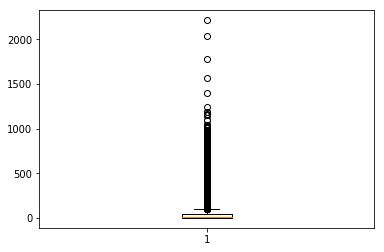

In [14]:
error = error.fillna(0)
plt.boxplot(error,sym='o',whis=1.5)
plt.show()

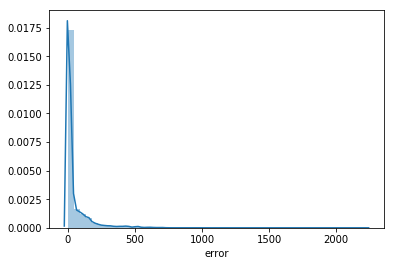

In [15]:
import seaborn as sns
sns.distplot(error, kde=True)

In [9]:
print(error.min(),error.quantile(0.25) ,error.median(),error.quantile(0.75),error.max())

0.0 1.0 7.97 38.89 2213.83


In [11]:
error[error.isnull()]

85842    NaN
112632   NaN
Name: error, dtype: float64